# Import & export

In [1]:
import os

if not os.path.exists("./data/graph-schema"):
    os.makedirs("./data/graph-schema")

## Exporting a graph

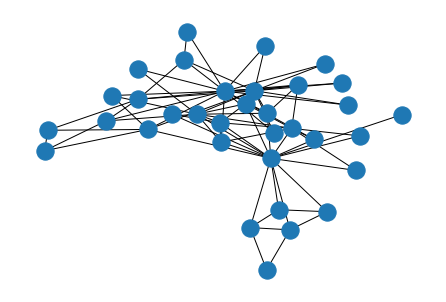

In [2]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt

G = nx.karate_club_graph()
nx.write_adjlist(G, "./data/graph-schema/graph.adjlist")

nx.draw(G)
plt.show()

## Importing a graph from adjacency list

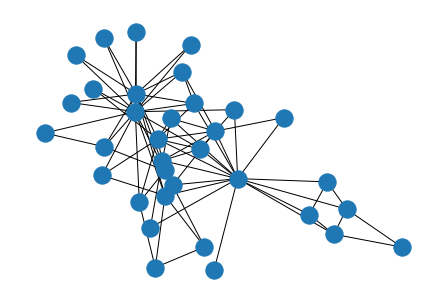

In [3]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt

G = nx.read_adjlist("./data/graph-schema/graph.adjlist")

nx.draw(G)
plt.show()

## Importing a graph from a CSV file

In [4]:
%%bash

wget -qO ./data/graph-schema/graph.csv "https://raw.githubusercontent.com/memgraph/graph-analytics-course/master/lecture-2/import-export/graph.csv"

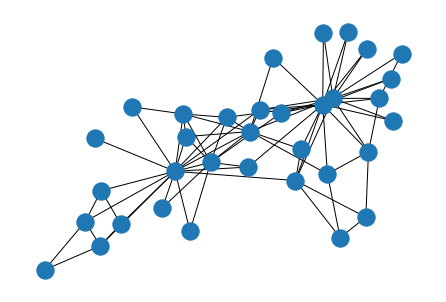

In [5]:
import pandas as pd
import networkx as nx
%matplotlib inline
import matplotlib.pyplot as plt

use_pandas = True
Graphtype = nx.Graph()

# Using pandas
if use_pandas:
    df = pd.read_csv("./data/graph-schema/graph.csv")
    G = nx.from_pandas_edgelist(df, create_using=Graphtype)
# Without pandas
else:
    Data = open("./data/graph-schema/graph.csv", "r")
    next(Data, None)
    G = nx.parse_edgelist(Data, delimiter=',',
        create_using=Graphtype, nodetype=int)

nx.draw(G)
plt.show()

## Exporting a graph with node/edge data

In [6]:
%%bash

wget -qO ./data/graph-schema/graph.graphml "https://github.com/memgraph/graph-analytics-course/raw/master/dataset/graph-schema/graph.graphml"

In [7]:
import os

if not os.path.exists("./output"):
    os.makedirs("./output")

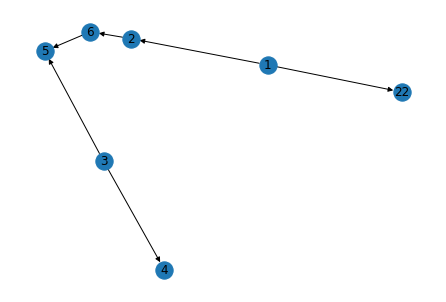

In [8]:
import networkx as nx
%matplotlib inline
import matplotlib.pyplot as plt

G = nx.read_graphml("./data/graph-schema/graph.graphml")

nx.write_gpickle(G, "./output/graph.gpickle")
G_imported = nx.read_gpickle("./output/graph.gpickle")

nx.draw(G_imported, with_labels=True)
plt.show()

## Graph generators

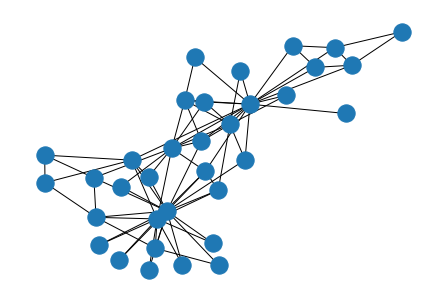

In [9]:
import networkx as nx
%matplotlib inline
import matplotlib.pyplot as plt

G = nx.karate_club_graph()

nx.draw(G)
plt.show()

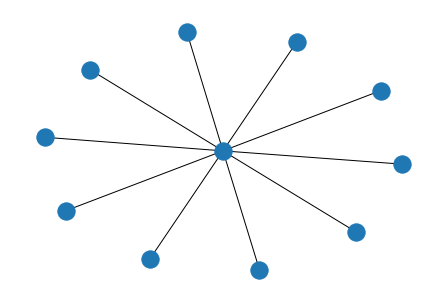

In [10]:
import networkx as nx
%matplotlib inline
import matplotlib.pyplot as plt

G = nx.star_graph(10)

nx.draw(G)
plt.show()

# Visualization using Matplotlib

## Draw a graph with a layout

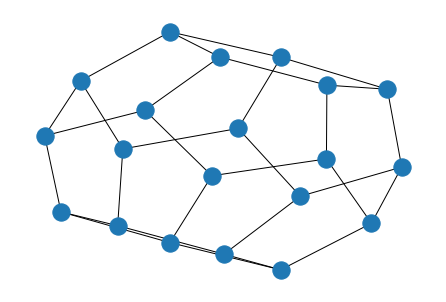

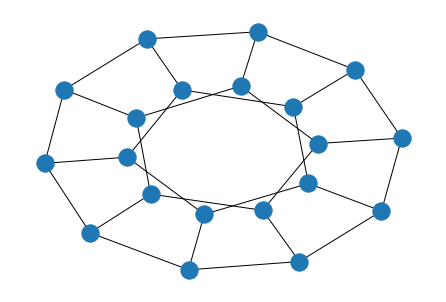

In [11]:
import networkx as nx
%matplotlib inline
import matplotlib.pyplot as plt

G = nx.dodecahedral_graph()

nx.draw(G)
plt.show()

# This will draw a graph with the same layout 
# (spring layout is the default)
nx.draw(G, pos=nx.spring_layout(G))
plt.show()

## Draw a directed graph without arrows

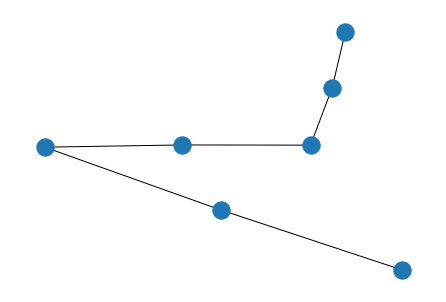

In [12]:
import networkx as nx
%matplotlib inline
import matplotlib.pyplot as plt

# Importing graphs from a file
G =  nx.read_graphml("./data/graph-schema/graph.graphml")

# Draw without arrows
nx.draw(G, arrows=False)
plt.show()

## Draw a directed graph with node labels

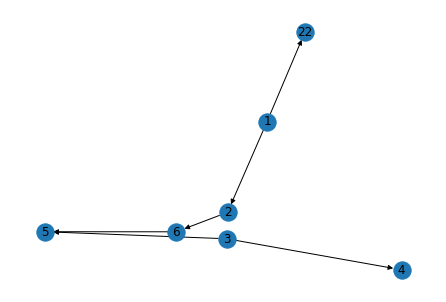

In [13]:
import networkx as nx
%matplotlib inline
import matplotlib.pyplot as plt

# Importing graphs from a file
G = nx.read_graphml("./data/graph-schema/graph.graphml")

# Draw with default node labels
nx.draw(G, with_labels=True)
plt.show()

## Draw a graph with custome node labels

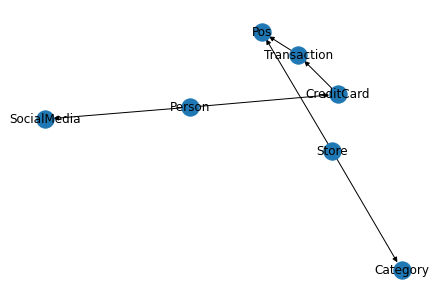

In [14]:
import networkx as nx
%matplotlib inline
import matplotlib.pyplot as plt

# Importing graphs from a file
G = nx.read_graphml("./data/graph-schema/graph.graphml")

# Draw with custom node labels
pos = nx.spring_layout(G)
nx.draw(G, pos)

node_labels = nx.get_node_attributes(G, "label")
nx.draw_networkx_labels(G, pos, labels = node_labels)
plt.show()

## Draw a graph with custom edge labels

[('1', '2', {'type': 'OWNS'}), ('1', '22', {'type': 'HAS_ACCOUNT'}), ('2', '6', {'type': 'HAS_TRANSACTION'}), ('3', '4', {'type': 'IS_OF_CATEGORY'}), ('3', '5', {'type': 'HAS_POS_DEVICE'}), ('6', '5', {'type': 'TRANSACTION_AT'})]


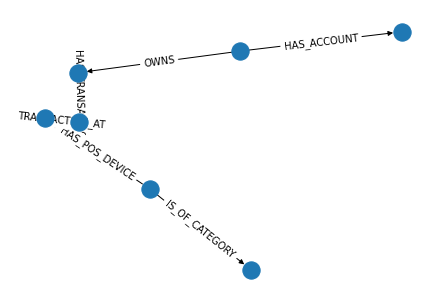

In [15]:
import networkx as nx
%matplotlib inline
import matplotlib.pyplot as plt

# Importing graphs from a file
G = nx.read_graphml("./data/graph-schema/graph.graphml")
print(G.edges(data=True))

# Draw with custom edge labels
pos = nx.spring_layout(G)
nx.draw(G, pos)

edge_labels = nx.get_edge_attributes(G, "type")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.show()

## Draw a graph with custom colors

In [16]:
%%bash

wget -qO ./data/graph-schema/graph.gexf "https://github.com/memgraph/graph-analytics-course/raw/master/dataset/graph-schema/graph.gexf"

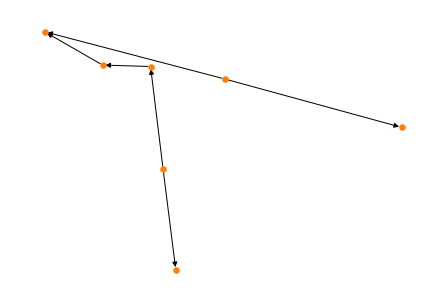

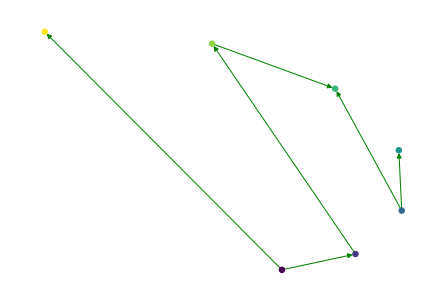

In [17]:
import numpy as np
import networkx as nx
from networkx.drawing import layout
%matplotlib inline
import matplotlib.pyplot as plt

# Importing graphs from a file
G = nx.read_gexf("./data/graph-schema/graph.gexf")

nx.draw(G, node_size=30, node_color='C1')
plt.show()

# Defining the node colors
colors = np.linspace(0, 1, len(G.nodes))
layout = nx.spiral_layout(G)
nx.draw(G, node_size=30, node_color=colors,
    pos=layout, edge_color="g")
plt.show()

## Difference between draw() and draw-network()

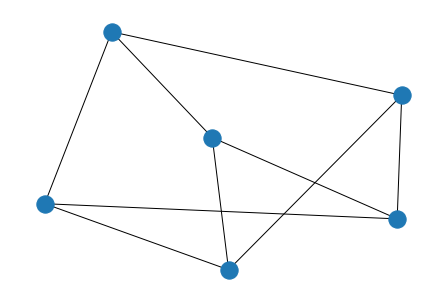

In [18]:
import networkx as nx
%matplotlib inline
import matplotlib.pyplot as plt

K33 = nx.complete_bipartite_graph(3, 3)

# Visualize the graph with the draw() method
nx.draw(K33)
plt.show()

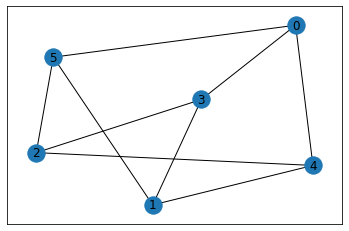

In [19]:
import networkx as nx
%matplotlib inline
import matplotlib.pyplot as plt

K33 = nx.complete_bipartite_graph(3, 3)

# Visualize the graph with the draw_networkx() method
nx.draw_networkx(K33)
plt.show()

## Draw a graph with custom positions

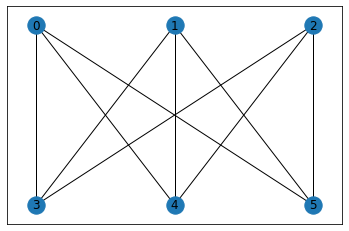

In [20]:
import networkx as nx
%matplotlib inline
import matplotlib.pyplot as plt

K33 = nx.complete_bipartite_graph(3, 3)

positions = {0:[-1,1], 1:[0,1], 2:[1,1], 3:[-1,-1], 4:[0,-1], 5:[1,-1]}
nx.draw_networkx(K33, positions)
plt.show()

## Draw a graph with custom options

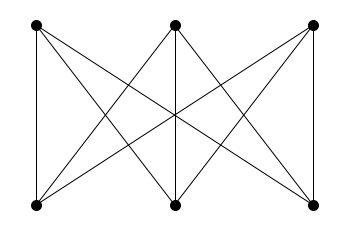

In [21]:
import networkx as nx
%matplotlib inline
import matplotlib.pyplot as plt

K33 = nx.complete_bipartite_graph(3,3)

positions = {0:[-1,1], 1:[0,1], 2:[1,1], 3:[-1,-1], 4:[0,-1], 5:[1,-1]}
ax = plt.figure().gca()
ax.set_axis_off()
options = {"node_size":100, "node_color":"k"}
nx.draw_networkx(K33, positions, with_labels=False, **options)
plt.show()

# Visualization using GraphViz

## Draw a graph with GraphViz

In [22]:
import networkx as nx
from networkx.drawing.nx_agraph import to_agraph

G = nx.read_gexf("./data/graph-schema/graph.gexf")

A = to_agraph(G)
A.layout("dot")
A.draw("./output/graphviz-schema-1.png")
print(A)

strict digraph "" {
	graph [bb="0,0,281.24,252",
		edge_default="{}",
		mode=static,
		node_default="{}"
	];
	node [label="\N"];
	1	[age=40,
		height=0.5,
		label=Person,
		name="John Doe",
		pos="139.64,234",
		width=1.1735];
	2	[compromised=False,
		height=0.5,
		label=CreditCard,
		name=Visa,
		pos="65.644,162",
		width=1.7332];
	1 -> 2	[id=0,
		pos="e,82.883,179.31 122.85,217.12 113.24,208.03 101.01,196.46 90.33,186.35"];
	22	[followers=2000,
		height=0.5,
		label=SocialMedia,
		platform=Facebook,
		pos="213.64,162",
		username=john_doe,
		width=1.8776];
	1 -> 22	[id=1,
		pos="e,196.15,179.55 156.44,217.12 165.98,208.09 178.1,196.62 188.73,186.57"];
	6	[fraudReported=False,
		height=0.5,
		label=Transaction,
		pos="65.644,90",
		width=1.8234];
	2 -> 6	[id=2,
		pos="e,65.644,108.1 65.644,143.7 65.644,135.98 65.644,126.71 65.644,118.11"];
	5	[compromised=False,
		height=0.5,
		label=Pos,
		pos="76.644,18",
		width=0.75];
	6 -> 5	[id=5,
		pos="e,73.956,36.104 68.363,71.697 69.575,63.9

## Node Attributes in GraphViz

In [23]:
import networkx as nx
from networkx.drawing.nx_agraph import to_agraph

def add_attribute_to_nodes(G, key, value, node_label):
    for node_id in G.nodes:
        if(G.nodes[node_id]["label"]==node_label):
            G.nodes[node_id][key]=value
            
G = nx.read_gexf("./data/graph-schema/graph.gexf")

add_attribute_to_nodes(G, "style", "filled", "Person")
add_attribute_to_nodes(G, "fillcolor", "red", "Person")
add_attribute_to_nodes(G, "style", "filled", "Store")
add_attribute_to_nodes(G, "fillcolor", "orange", "Store")

G.edges["1", "2"]["color"] = "purple"
G.edges["1", "2"]["arrowsize"] = 2.0
G.edges["1", "2"]["penwidth"] = 2.0

G.graph["graph"] = {"rankdir":"LR"}
G.graph["node"] = {"shape":"circle"}
G.graph["edges"] = {"arrowsize":"4.0"}

A = to_agraph(G)
A.layout("dot")
A.draw("./output/graphviz-schema-2.png")
print(A)

strict digraph "" {
	graph [bb="0,0,565.56,281.24",
		edge_default="{}",
		edges="{'arrowsize': '4.0'}",
		mode=static,
		node_default="{}",
		rankdir=LR
	];
	node [label="\N",
		shape=circle
	];
	1	[age=40,
		fillcolor=red,
		height=1.1735,
		label=Person,
		name="John Doe",
		pos="42.246,141.59",
		style=filled,
		width=1.1735];
	2	[compromised=False,
		height=1.7332,
		label=CreditCard,
		name=Visa,
		pos="188.09,215.59",
		width=1.7332];
	1 -> 2	[arrowsize=2.0,
		color=purple,
		id=0,
		penwidth=2.0,
		pos="e,132.26,187.39 80.289,160.65 90.791,166.05 102.6,172.13 114.44,178.22"];
	22	[followers=2000,
		height=1.8776,
		label=SocialMedia,
		platform=Facebook,
		pos="188.09,67.594",
		username=john_doe,
		width=1.8776];
	1 -> 22	[id=1,
		pos="e,127.57,98.214 80.289,122.54 91.989,116.52 105.31,109.66 118.49,102.88"];
	6	[fraudReported=False,
		height=1.8234,
		label=Transaction,
		pos="357.32,215.59",
		width=1.8234];
	2 -> 6	[id=2,
		pos="e,291.42,215.59 250.88,215.59 260.79,215.59 2